# Apporaching categorical variables

## What are categorical variables?


Categorical variables/features are any feature type can be classified into two major types:

 • Nominal
 
 • Ordinal
 
 
**Nominal variables** are variables that have two or more categories which do not have any kind of order associated with them. For example, if gender is classified into two groups, i.e. male and female, it can be considered as a nominal variable. 


**Ordinal variables**, on the other hand, have “levels” or categories with a particular order associated with them. For example, an ordinal categorical variable can be a feature with three different levels: low, medium and high. Order is important. 

As far as definitions are concerned, we can also categorize categorical variables as **binary**, i.e., a categorical variable with only two categories. Some even talk about a type called **cyclic** for categorical variables. Cyclic variables are present in “cycles” for example, days in a week: Sunday, Monday, Tuesday, Wednesday, Thursday, Friday and Saturday. After Saturday, we have Sunday again. This is a cycle. Another example would be hours in a day if we consider them to be categories. 


We will be using **cat-in-the-dat** from Categorical Features Encoding Challenge from Kaggle. 

In [1]:
import numpy as np
import pandas as pd
df = pd.read_csv("train.csv")

In [2]:
df.head()

,id,bin_0,bin_1,bin_2,bin_3,bin_4,nom_0,nom_1,nom_2,nom_3,...,nom_9,ord_0,ord_1,ord_2,ord_3,ord_4,ord_5,day,month,target
0,0,0.0,0.0,0.0,F,N,Red,Trapezoid,Hamster,Russia,...,02e7c8990,3.0,Contributor,Hot,c,U,Pw,6.0,3.0,0
1,1,1.0,1.0,0.0,F,Y,Red,Star,Axolotl,NaN,...,f37df64af,3.0,Grandmaster,Warm,e,X,pE,7.0,7.0,0
2,2,0.0,1.0,0.0,F,N,Red,NaN,Hamster,Canada,...,NaN,3.0,NaN,Freezing,n,P,eN,5.0,9.0,0
3,3,NaN,0.0,0.0,F,N,Red,Circle,Hamster,Finland,...,f9d456e57,1.0,Novice,Lava Hot,a,C,NaN,3.0,3.0,0
4,4,0.0,NaN,0.0,T,N,Red,Triangle,Hamster,Costa Rica,...,c5361037c,3.0,Grandmaster,Cold,h,C,OZ,5.0,12.0,0


### The Dataset consist of all kinds of categorical variables:
* **Nominal**
* **Ordinal**
* **Cyclical**
* **Binary**


It is abinary classification problem.

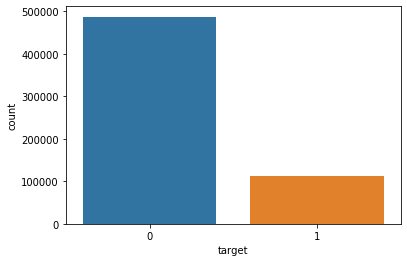

In [3]:
import seaborn as sns
sns.countplot(x = "target", data  = df)

~As we know that the target is skewed so we will use **ROC Curve** to evaluate result.

Overall, there are: 

    • Five binary variables 
    • Ten nominal variables 
    • Six ordinal variables 
    • Two cyclic variables 
    • And a target variable 
    
ord_2 feature consists of six different categories: 

    • Freezing 
    • Warm 
    • Cold 
    • Boiling Hot 
    • Hot 
    • Lava Hot
    
We have to know that computers do not understand text data and thus, we need to convert these categories to numbers. A simple way of doing this would be to create a dictionary that maps these values to numbers starting from 0 to N-1, where N is the total number of categories in a given feature.

In [4]:
mapping = {
    "Freezing" : 0,
    "Warm" : 1,
    "Cold" : 2,
    "Boiling Hot" : 3,
    "Hot" : 4,
    "Lava Hot" : 5
}

In [5]:
#Value count before mapping
df.ord_2.value_counts()

Freezing       142726
Warm           124239
Cold            97822
Boiling Hot     84790
Hot             67508
Lava Hot        64840
Name: ord_2, dtype: int64

Now we can read the dataset and convert these categories to numbers easily.

In [6]:
df.loc[ :, "ord_2"] = df.ord_2.map(mapping)

In [7]:
#Value count after mapping
df.ord_2.value_counts()

0.0    142726
1.0    124239
2.0     97822
3.0     84790
4.0     67508
5.0     64840
Name: ord_2, dtype: int64

In [8]:
df.ord_2.isnull().sum()

18075

This type of encoding of categorical vairbales is known as **Label Encoding** i.e encoding every category as a numerical label.

In [9]:
#LabelEncoder from scikit-learn.
import pandas as pd
from sklearn import preprocessing 

#read the data 
df = pd.read_csv("train.csv")

#fill NaN values in ord_2 column
#df.loc[:,"ord_2"] = df.ord.fillna("NONE")

# initalize LabelEncoder
df.loc[:,"ord_2"] = df.ord_2.fillna("NONE")

#initialize LabelEnocder
lbl_enc = preprocessing.LabelEncoder()

#fit label encoder and transfrom values on ord_2 column
# P.S : do not use this directly. fit first, then transform
df.loc[:,"ord_2"] = lbl_enc.fit_transform(df.ord_2.values)


You first need to fillna from pandas cause LabelEncoder from scikit-learn does not handle NAN values and ord_2 column have NAN values.

**We can use Label Encoding directly in many tree-based models:**
    * Decision trees
    * Random forest
    * Extra Trees
    * Or any kind of boosted trees model
         * XGBoost
         * GBM
         * LightGBM
         
This type of encoding cannot be used in linear models, SVM or neural network as they expect data to be **normalized**

For these types of models, we can binarize the data.

* Freezing --> 0 --> 0 0 0 
* Warm --> 1 --> 0 0 1 
* Cold --> 2 --> 0 1 0
* Boiling Hot --> 3 --> 0 1 1 
* Hot --> 4 --> 1 0 0 
* Lava Hot --> 5 --> 1 0 1 
   
   

This is just converting the categories to numbers and then converting them to their binary representation.

We are thus splitting one feature into three (in this case) features (or columns). If we have more categories, we might end up splitting into a lot more columns. 

It becomes easy to store lots of binarized variables like this if we store them in a **sparse format.** 

### sparse format
A sparse format is nothing but a representation or way of storing data in memory in which you do not store all the values but only the values that matter. In the case of binary variables described above, all that matters is where we have ones (1s). It’s difficult to imagine a format like this but should become clear with an example. Let’s assume that we are provided with only one feature in the dataframe above:

ord_2

| Index | Feature 
| --- | --- | 
| 0 | Warm |
| 1 | Hot  |
| 2 | Lava hot |


Currently, we are looking at only three samples in the daatset. Let's convert this to binary representation where we have three for each sample.

These three items are the three features.

| Index | Feature_0 | Feature_1 | Feature_2
| --- | --- | --- | --- |
| 0 | 0 | 0 | 1 |
| 1 | 1 | 0 | 0 |
| 2 | 1 | 0 | 1 |


So, our feature are stored in a matrix which has 3 rows and 3 columns. Each element of matrix occupies 8 bytes. So, our total memory requirement for this array is 8x3x3 = 72 bytes

We can also check this using python snippet.

In [10]:
import numpy as np 

#create our example feature matrix 
example = np.array( [ [0, 0, 1], [1, 0, 0], [1, 0, 1] ] ) 

#print size in bytes 

print(example.nbytes)

72


As mentioned before we are only interested in 1s. 0s are not that important because anything multiplied with 0 will be zero and 0 added/subtracted to/from anything doesn’t make any difference. One way to represent this matrix only with ones would be some kind of dictionary method in which keys are indices of rows and columns and value is 1:

* (0, 2) 1 
* (1, 0) 1 
* (2, 0) 1 
* (2, 2) 1 

The total memory used will be 8x4 = 32 bytes.

Any numpy array can be converted to a sparse matrix by simple python code.

In [11]:
import numpy as np
from scipy import sparse 


#create our example feature matrix

example = np.array(
    [
     [0,0,1],
     [1,0,0],
     [1,0,1]   
    ]
)

# convert numpy array to saprse CSR matrix 
sparse_example = sparse.csr_matrix(example)


#print size of this sparse matrix 
print(sparse_example.data.nbytes)

32


The total size of the sparse csr matrix is the sum of three values.

In [12]:
print(
    sparse_example.data.nbytes + 
    sparse_example.indptr.nbytes + 
    sparse_example.indices.nbytes
)

64


Even though the sparse representation of binarized features takes much less memory than its dense representation, there is another transformation for categorical variable that takes even less memory. That is known as **One Hot Encoding.**